# Team One - Dublin Bikes - Machine Learning Model notebook

In [1]:
# Library Imports.
import pandas as pd
from pandas.tools import plotting
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import DBjson
import json
import datetime
import pickle
import re

# Allows plots to appear directly in the notebook.
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate

#define database access information
host="dbproject.cqkm9hf5jptc.eu-west-1.rds.amazonaws.com"
port=3306
dbname="dublinbikesDB"
user="user"
password="dublinbikes"

### First we analysed the relationships between different features and the target outcome, i.e. the number of available bikes

#### We first tried to see if there is a common trend among all the stations

In [5]:
#extract information about every station (up to 20th March)
#The query will take a while to execute
AllStations_AllWeather = 'SELECT * FROM dublinbikesDB.dublinBikesInfo, dublinbikesDB.weatherInfo WHERE dublinBikesInfo.dateTime = weatherInfo.dateTime AND dublinBikesInfo.dateTime < "2019/03/20";'
#fetch all data for one station
AllStations_info = DBjson.fetchFromDB(host,port,dbname,user,password,AllStations_AllWeather)
#make dataframe
df_AllStations= pd.DataFrame(AllStations_info)


In [8]:
df_AllStations.head(3)

,clouds,dateTime,humidity,pressure,stationBanking,stationBikesAvailable,stationLastUpdate,stationLat,stationLong,stationName,...,temperature,visibility,weatherDescr,weatherID,weatherIcon,weatherInfo.dateTime,weatherMain,windDeg,windGust,windSpeed
0,75,2019-02-18 20:36:00,87,1010,0,24,0000-00-00 00:00:00,53.3594,-6.27614,AVONDALE ROAD,...,7,10000,broken clouds,803,04n,2019-02-18 20:36:00,Clouds,250,NaN,5
1,75,2019-02-18 20:36:00,87,1010,0,6,0000-00-00 00:00:00,53.3417,-6.23620,BARROW STREET,...,7,10000,broken clouds,803,04n,2019-02-18 20:36:00,Clouds,250,NaN,5
2,75,2019-02-18 20:36:00,87,1010,0,2,0000-00-00 00:00:00,53.3442,-6.23345,BENSON STREET,...,7,10000,broken clouds,803,04n,2019-02-18 20:36:00,Clouds,250,NaN,5


In [9]:
#create column for day of the week
df_AllStations['weekday'] = df_AllStations['dateTime'].dt.dayofweek
df_AllStations['hour'] = df_AllStations['dateTime'].dt.hour
df_AllStations['minutes'] = df_AllStations['dateTime'].dt.minute

In [10]:
#assign value to encoded days
df_AllStations['weekday'] = df_AllStations['weekday'].replace(0, 'Monday')
df_AllStations['weekday'] = df_AllStations['weekday'].replace(1, 'Tuesday')
df_AllStations['weekday'] = df_AllStations['weekday'].replace(2, 'Wednesday')
df_AllStations['weekday'] = df_AllStations['weekday'].replace(3, 'Thursday')
df_AllStations['weekday'] = df_AllStations['weekday'].replace(4, 'Friday')
df_AllStations['weekday'] = df_AllStations['weekday'].replace(5, 'Saturday')
df_AllStations['weekday'] = df_AllStations['weekday'].replace(6, 'Sunday')

### plot figures to understand any possible trend between all stations

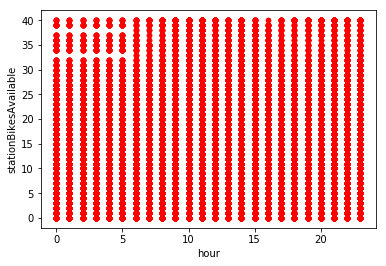

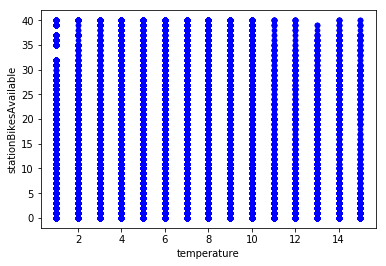

In [12]:
df_AllStations.loc[df_AllStations['weekday']=='Monday'].plot(kind='scatter', x='hour', y='stationBikesAvailable', color='r')    
df_AllStations.loc[df_AllStations['weekday']=='Monday'].plot(kind='scatter', x='temperature', y='stationBikesAvailable', color='b')    


<b>It is clear that considering all the stations at the same time doesn't give any indication about a possible relation between certain features and the available bikes.

We therefore extract only the information regarding a single station. This reflects also the fact that some station may be more or less busier than others based on various factors (e.g. location, time, etc...)</b>

### We analysed in more details 2 stations: SMITHFIELD and ST. STEPHEN'S GREEN SOUTH

### SMITHFIELD data preparation

In [13]:
#extract information about one station "SMITHFIELD"
Smithfield_AllWeather = 'SELECT * FROM dublinbikesDB.dublinBikesInfo, dublinbikesDB.weatherInfo WHERE dublinBikesInfo.dateTime = weatherInfo.dateTime AND dublinBikesInfo.dateTime < "2019/04/01" AND dublinBikesInfo.stationName="SMITHFIELD";'
#fetch all data for one station
Smithfield_info = DBjson.fetchFromDB(host,port,dbname,user,password,Smithfield_AllWeather)
#make dataframe
df_Smithfield = pd.DataFrame(Smithfield_info)

In [14]:
#create column for day of the week
df_Smithfield['weekday'] = df_Smithfield['dateTime'].dt.dayofweek
df_Smithfield['hour'] = df_Smithfield['dateTime'].dt.hour
df_Smithfield['minutes'] = df_Smithfield['dateTime'].dt.minute

In [15]:
df_Smithfield['weekday'] = df_Smithfield['weekday'].replace(0, 'Monday')
df_Smithfield['weekday'] = df_Smithfield['weekday'].replace(1, 'Tuesday')
df_Smithfield['weekday'] = df_Smithfield['weekday'].replace(2, 'Wednesday')
df_Smithfield['weekday'] = df_Smithfield['weekday'].replace(3, 'Thursday')
df_Smithfield['weekday'] = df_Smithfield['weekday'].replace(4, 'Friday')
df_Smithfield['weekday'] = df_Smithfield['weekday'].replace(5, 'Saturday')
df_Smithfield['weekday'] = df_Smithfield['weekday'].replace(6, 'Sunday')

### Plotting information about SMITHFIELD station
<b> we considered the features hour, temperature and weather.
    
in <font color='red'>red</font> we can see data from a weekday
in <font color='yellow'>yellow</font> we can see data from a weekend
</b>

Text(0.5,0.98,'Weekend')

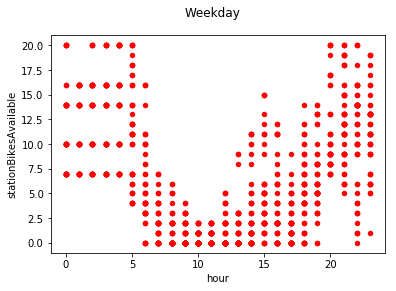

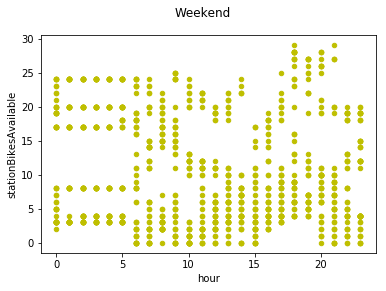

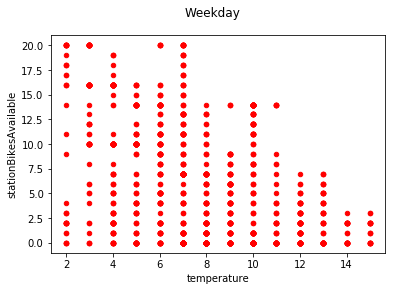

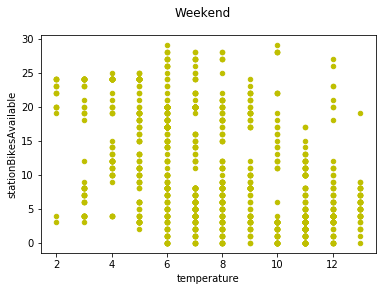

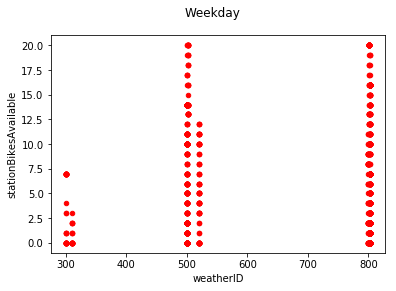

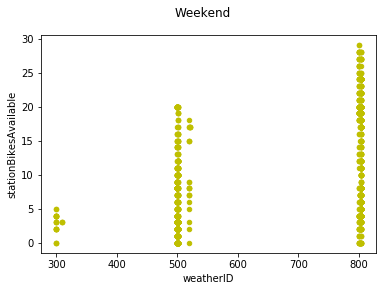

In [24]:
df_Smithfield.loc[df_Smithfield['weekday']=='Tuesday'].plot(kind='scatter', x='hour', y='stationBikesAvailable', color='r')    
plt.suptitle('Weekday')
df_Smithfield.loc[df_Smithfield['weekday']=='Saturday'].plot(kind='scatter', x='hour', y='stationBikesAvailable', color='y')    
plt.suptitle('Weekend')

df_Smithfield.loc[df_Smithfield['weekday']=='Tuesday'].plot(kind='scatter', x='temperature', y='stationBikesAvailable', color='r')    
plt.suptitle('Weekday')
df_Smithfield.loc[df_Smithfield['weekday']=='Saturday'].plot(kind='scatter', x='temperature', y='stationBikesAvailable', color='y')    
plt.suptitle('Weekend')

df_Smithfield.loc[df_Smithfield['weekday']=='Tuesday'].plot(kind='scatter', x='weatherID', y='stationBikesAvailable', color='r')    
plt.suptitle('Weekday')
df_Smithfield.loc[df_Smithfield['weekday']=='Saturday'].plot(kind='scatter', x='weatherID', y='stationBikesAvailable', color='y')    
plt.suptitle('Weekend')


### ST. STEPHENS GREEN SOUTH data preparation

In [19]:
#extract information about one station "ST STEPHENS GREEN"
Stephens_Green_AllWeather = 'SELECT * FROM dublinbikesDB.dublinBikesInfo, dublinbikesDB.weatherInfo WHERE dublinBikesInfo.dateTime = weatherInfo.dateTime AND dublinBikesInfo.dateTime < "2019/04/01" AND dublinBikesInfo.stationName="ST. STEPHEN\'S GREEN SOUTH";'
#fetch all data for one station
Stephens_Green_info = DBjson.fetchFromDB(host,port,dbname,user,password,Stephens_Green_AllWeather)
#make dataframe
df_Stephens_Green = pd.DataFrame(Stephens_Green_info)


In [20]:
#create column for day of the week
df_Stephens_Green['weekday'] = df_Stephens_Green['dateTime'].dt.dayofweek
df_Stephens_Green['hour'] = df_Stephens_Green['dateTime'].dt.hour
df_Stephens_Green['minutes'] = df_Stephens_Green['dateTime'].dt.minute

In [21]:
df_Stephens_Green['weekday'] = df_Stephens_Green['weekday'].replace(0, 'Monday')
df_Stephens_Green['weekday'] = df_Stephens_Green['weekday'].replace(1, 'Tuesday')
df_Stephens_Green['weekday'] = df_Stephens_Green['weekday'].replace(2, 'Wednesday')
df_Stephens_Green['weekday'] = df_Stephens_Green['weekday'].replace(3, 'Thursday')
df_Stephens_Green['weekday'] = df_Stephens_Green['weekday'].replace(4, 'Friday')
df_Stephens_Green['weekday'] = df_Stephens_Green['weekday'].replace(5, 'Saturday')
df_Stephens_Green['weekday'] = df_Stephens_Green['weekday'].replace(6, 'Sunday')

### Plotting information about ST. STEPHENS GREEN station
<b> we considered the features hour, temperature and weather.
    
in <font color='red'>red</font> we can see data from a weekday
in <font color='yellow'>yellow</font> we can see data from a weekend
</b>

Text(0.5,0.98,'Weekends')

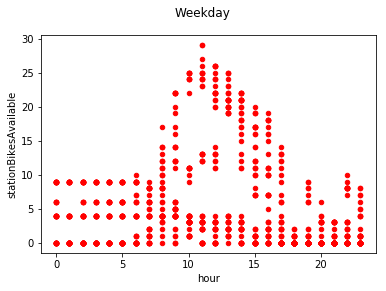

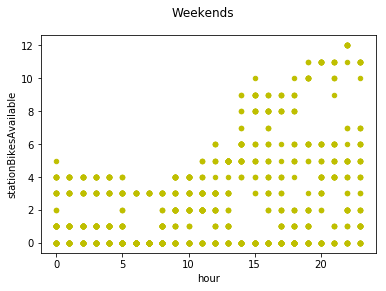

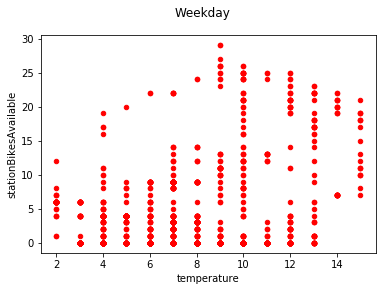

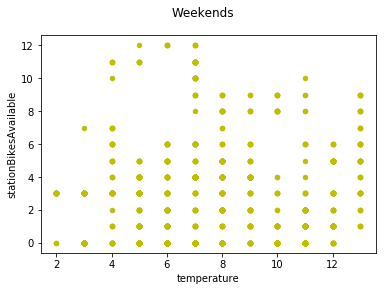

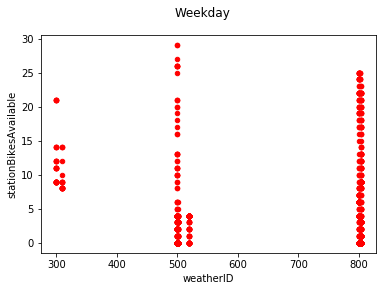

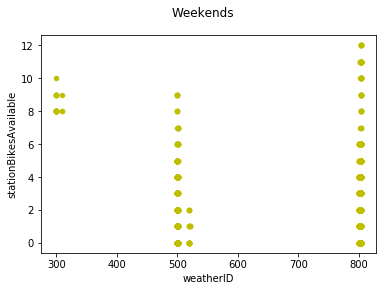

In [23]:
df_Stephens_Green.loc[df_Stephens_Green['weekday']=='Tuesday'].plot(kind='scatter', x='hour', y='stationBikesAvailable', color='r')    
plt.suptitle('Weekday')
df_Stephens_Green.loc[df_Stephens_Green['weekday']=='Saturday'].plot(kind='scatter', x='hour', y='stationBikesAvailable', color='y')    
plt.suptitle('Weekends')

df_Stephens_Green.loc[df_Stephens_Green['weekday']=='Tuesday'].plot(kind='scatter', x='temperature', y='stationBikesAvailable', color='r')    
plt.suptitle('Weekday')
df_Stephens_Green.loc[df_Stephens_Green['weekday']=='Saturday'].plot(kind='scatter', x='temperature', y='stationBikesAvailable', color='y')    
plt.suptitle('Weekends')

df_Stephens_Green.loc[df_Stephens_Green['weekday']=='Tuesday'].plot(kind='scatter', x='weatherID', y='stationBikesAvailable', color='r')    
plt.suptitle('Weekday')
df_Stephens_Green.loc[df_Stephens_Green['weekday']=='Saturday'].plot(kind='scatter', x='weatherID', y='stationBikesAvailable', color='y')    
plt.suptitle('Weekends')


### From the graphs above we can make a few observations:
    
- different stations have different behaviours, we will therefore create a specific model for each station
- the same station shows different behaviours in the bike availabilty considering weekdays or weekends, we will therefore create, for each station, a model for weekdays (Mon-Fri) and a model for weekends(Sat-Sun)
- there is a strong relationship between the number of the available bikes and the hour. SMITHFIELD station shows that in the morning at 10 am the number of available bikes is the lowest while the opposite is observed in ST. STEPHEN'S GREEN SOUTH. 
- the relation between available bikes and temperature is not very clear. This could be due to the fact that the data has been collected for only a short period of time and the temperature doesn't show wide variations
- the relation between available bikes and weatherID (where the weather IDs between 500 and 530 represent rainy conditions) doesn't show any specific behaviour. However, we can observe that most of the data falls in two weathersID: 500 up to 530 (rain conditions) and 800 (no rain conditions)


### We will now inspect in more detail the strongest relationship observed: Available Bikes and hour

<b> plotting hour and available bike on station SMITHFIELD for a weekday </b>

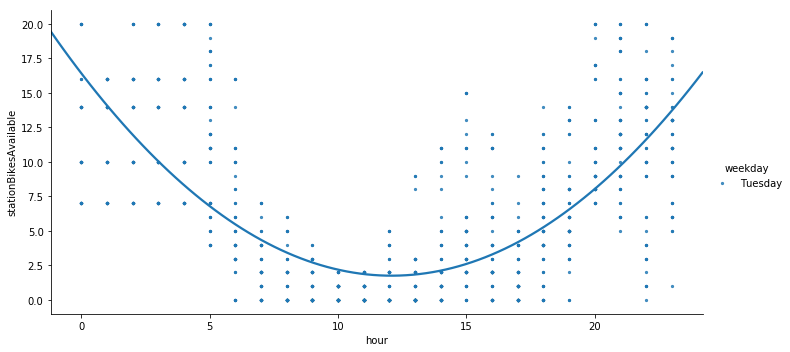

In [25]:
sns.lmplot(x="hour", y="stationBikesAvailable", data=df_Smithfield.loc[df_Smithfield['weekday']=='Tuesday'], hue='weekday', 
           order=2, ci=None, scatter_kws={"s": 5}, aspect=2);


<b> plotting hour and available bike on station ST. STEPHENS GREEN SOUTH for a weekday </b>

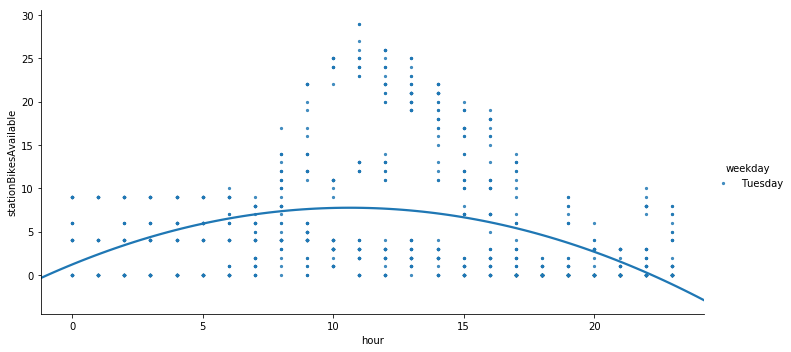

In [26]:
sns.lmplot(x="hour", y="stationBikesAvailable", data=df_Stephens_Green.loc[df_Stephens_Green['weekday']=='Tuesday'], hue='weekday', 
           order=2, ci=None, scatter_kws={"s": 5}, aspect=2);


<b> plotting summary graph containing a curve for each day on SMITHFIELD station</b>

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


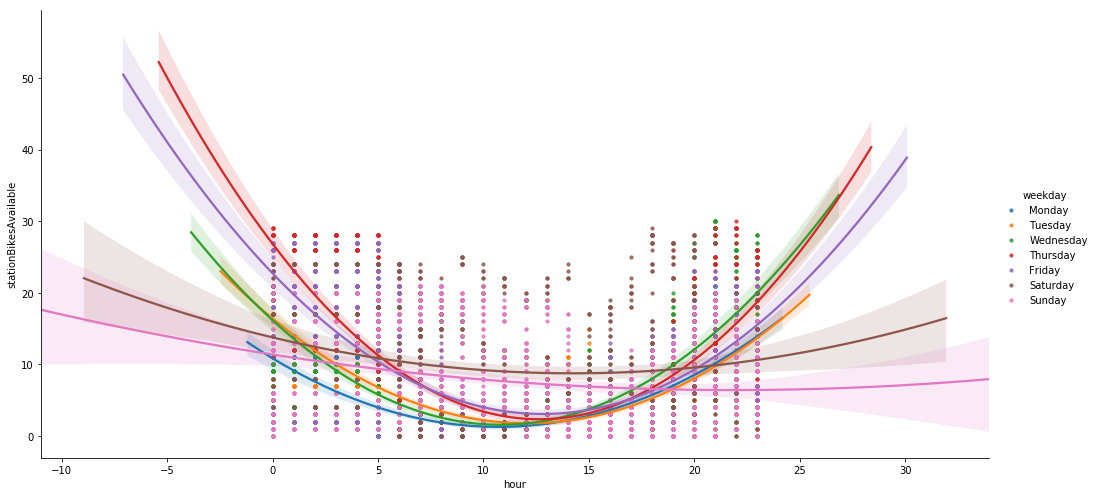

In [31]:
plot=sns.lmplot(x="hour", y="stationBikesAvailable", data=df_Smithfield, hue='weekday', order=2, ci=100, 
           scatter_kws={"s": 10},height=7, aspect=2);

<b> plotting summary graph containing a curve for each day on ST. STEPHENS GREEN SOUTH station</b>

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


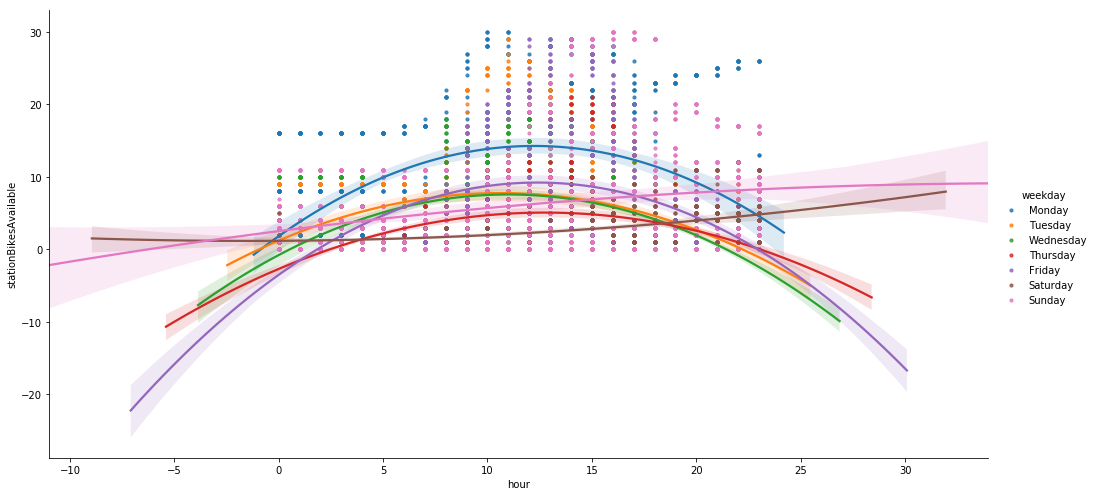

In [30]:
plot=sns.lmplot(x="hour", y="stationBikesAvailable", data=df_Stephens_Green, hue='weekday', order=2, ci=100, 
           scatter_kws={"s": 10},height=7, aspect=2);


### From the graphs above we observed that:
- even if with a different shape, the relationship between hour and available bikes on the two stations is not linear but can be well represented with a polynomial line of degree 2.
- again, the bahaviour is different considering weekdays, where the shape of the curve can be easily recognized, or weekends, where the curve approximates a straight line.

#### We therefore decided to create a machine learning model based on multiple linear regression:
- multiple becuase we will combine different features together 
- we will use the same approach adopted in linear regression with the difference that the prediction won't be based on a straight line but on a curve of degree 2

## 1st approach and testing

<b>taking as test station SMITHFIELD

multiple linear regression using a polynomial degree 2 curve instead that a straight line</b>

In [32]:
#extract all information about one station "SMITHFIELD" 
Smithfield_All = 'SELECT * FROM dublinbikesDB.dublinBikesInfo, dublinbikesDB.weatherInfo WHERE dublinBikesInfo.dateTime = weatherInfo.dateTime AND dublinBikesInfo.stationName="SMITHFIELD";'
#fetch all data for one station
Smithfield_All_info = DBjson.fetchFromDB(host,port,dbname,user,password,Smithfield_All)
#make dataframe
df_Smithfield_All = pd.DataFrame(Smithfield_All_info)


In [33]:
#create column for day of the week
df_Smithfield_All['weekday'] = df_Smithfield_All['dateTime'].dt.dayofweek
df_Smithfield_All['hour'] = df_Smithfield_All['dateTime'].dt.hour

In [34]:
#convert categorical weather feature into numerical with encoding
df_Smithfield_All['weatherMain'] = df_Smithfield_All['weatherMain'].replace(['Clear'], 1)
df_Smithfield_All['weatherMain'] = df_Smithfield_All['weatherMain'].replace(['Clouds'], 2)
df_Smithfield_All['weatherMain'] = df_Smithfield_All['weatherMain'].replace(['Drizzle'], 3)
df_Smithfield_All['weatherMain'] = df_Smithfield_All['weatherMain'].replace(['Fog'], 4)
df_Smithfield_All['weatherMain'] = df_Smithfield_All['weatherMain'].replace(['Mist'], 5)
df_Smithfield_All['weatherMain'] = df_Smithfield_All['weatherMain'].replace(['Rain'], 6)
df_Smithfield_All['weatherMain'] = df_Smithfield_All['weatherMain'].replace(['Snow'], 7)

In [37]:
#divide into training and testing sets for weekdays

df_Smithfield_Train = df_Smithfield_All.loc[df_Smithfield_All['dateTime'] < '2019/03/06']
df_Smithfield_Test = df_Smithfield_All.loc[(df_Smithfield_All['dateTime'] >= '2019/03/06')]

#df_Smithfield_Train.head(2)

### Training the model on first weeks of data using multiple features

In [40]:
#selecting multiple features
features = ["weekday","hour","weatherMain","temperature"]

#input values
x = df_Smithfield_Train[features]
#target values
y = df_Smithfield_Train.stationBikesAvailable

#use polynomial of degree 2
polynomial_features = PolynomialFeatures(degree=2)

#fit input value into polynomial
x_poly = polynomial_features.fit_transform(x)

#use linear regression model
model = LinearRegression()

#train model 
model.fit(x_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Testing the model on same data
Using the trained model to predict the target feature availablebikes on the same dataset

In [42]:
#predict using same input
y_poly_pred_test_data = model.predict(x_poly)

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y, pd.DataFrame(y_poly_pred_test_data, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg)


Predictions with multiple linear regression: 

      stationBikesAvailable  Predicted
0                         8   9.568813
1                         8   9.568813
2                        12   9.568813
3                        12   9.568813
4                         0   4.885580
5                         0   4.885580
6                         0   4.885580
7                         1   4.885580
8                         1   4.885580
9                         1   4.885580
10                        1   4.536454
11                        1   4.536454
12                        1   4.556557
13                        1   4.556557
14                        0   4.556557
15                        0   4.556557
16                        0   4.556557
17                        1   4.523343
18                        1   4.523343
19                        1   4.523343
20                        1   4.523343
21                        1   4.321880
22                        1   4.321880
23              

### Error evaluation on training data

In [43]:
#This function is used repeatedly to compute all metrics
def printMetrics(testActualVal, predictions):
    #classification evaluation measures
    print('Error Evaluation')
    print('==============================================================================')
    print("MAE (Mean Absolute Error): ", metrics.mean_absolute_error(testActualVal, predictions))
    print("MSE (Mean Squared Error): ", metrics.mean_squared_error(testActualVal, predictions))
    print("RMSE (Root Mean Squared Error): ", metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))


In [44]:
printMetrics(y, y_poly_pred_test_data)

Error Evaluation
MAE (Mean Absolute Error):  4.937073674033704
MSE (Mean Squared Error):  39.18991805056681
RMSE (Root Mean Squared Error):  6.260185145070936
R2:  0.3679066403982202


### Testing the model on new data
model tested on another dataset of more recent data (df_Smithfield_Test)

In [47]:
#selecting multiple features
features = ["weekday","hour","weatherMain","temperature"]

#input values
x = df_Smithfield_Test[features]
#target values
y = df_Smithfield_Test.stationBikesAvailable

#fit input value into polynomial
x_poly = polynomial_features.fit_transform(x)

#predict using new input
y_poly_pred_new_data = model.predict(x_poly)

### Error evaluation on new data

In [48]:
printMetrics(y, y_poly_pred_new_data)

Error Evaluation
MAE (Mean Absolute Error):  5.349922123986243
MSE (Mean Squared Error):  46.48004004433499
RMSE (Root Mean Squared Error):  6.817627156447835
R2:  0.3214143493211895


## 2nd approach and testing

taking as test station SMITHFIELD

Linear Regression using multiple feature

#### We realized that the errors are quite high especially when tested on the same dataset. In ordered to try to make the prediction more accurate, we worked more on the data preparation. 
We decided to take the following steps:
- divide time by half hour as we assumed that would not be possible to reach a greater precision with this amount of data
- create a binary feature to represent either rain or not rain. We have seen in the previous graphs that most of the data falls within these two consitions
- rather that having each day encoded with a digit, which has an numerical meaning on the prediction, each day is binary encode. With this approach, each day will be considered separately 
- consider only the stations opening hours, stations are closed between 00:30 and 5:00am. Therefore, we won't consider hours > 1:00am (leaving half hour gap) and < 5:00am
- split dataframes into weekdays and weekends as features have different relationships with the available bikes

In [49]:
#extract information about one station "SMITHFIELD" 
Smithfield_All = 'SELECT * FROM dublinbikesDB.dublinBikesInfo, dublinbikesDB.weatherInfo WHERE dublinBikesInfo.dateTime = weatherInfo.dateTime AND dublinBikesInfo.stationName="SMITHFIELD";'
#fetch all data for one station
Smithfield_All_info = DBjson.fetchFromDB(host,port,dbname,user,password,Smithfield_All)
#make dataframe
df_Smithfield_All = pd.DataFrame(Smithfield_All_info)


In [50]:
#create column for day of the week
df_Smithfield_All['weekday'] = df_Smithfield_All['dateTime'].dt.dayofweek
df_Smithfield_All['hour'] = df_Smithfield_All['dateTime'].dt.hour
df_Smithfield_All['minutes'] = df_Smithfield_All['dateTime'].dt.minute

In [51]:
#divide time by half hour - new column indicates this with .0/.5
df_Smithfield_All['time'] = np.where(df_Smithfield_All['minutes'] >= 30, df_Smithfield_All.hour + 0.5, df_Smithfield_All.hour)


In [52]:
#create a rain feature
df_Smithfield_All['rain'] = np.where((df_Smithfield_All['weatherID'] >= 500) & (df_Smithfield_All['weatherID'] <= 531), 1,0)


In [53]:
#binary encode days
df_Smithfield_All['Monday'] = np.where((df_Smithfield_All['weekday'] == 0),1,0)
df_Smithfield_All['Tuesday'] = np.where((df_Smithfield_All['weekday'] == 1),1,0)
df_Smithfield_All['Wednesday'] = np.where((df_Smithfield_All['weekday'] == 2),1,0)
df_Smithfield_All['Thursday'] = np.where((df_Smithfield_All['weekday'] == 3),1,0)
df_Smithfield_All['Friday'] = np.where((df_Smithfield_All['weekday'] == 4),1,0)
df_Smithfield_All['Saturday'] = np.where((df_Smithfield_All['weekday'] == 5),1,0)
df_Smithfield_All['Sunday'] = np.where((df_Smithfield_All['weekday'] == 6),1,0)

In [54]:
#create a dataframe only with open hours - half an hour grace left after close to return bikes
df_Smithfield_All = df_Smithfield_All.drop(df_Smithfield_All[(df_Smithfield_All.time > 1) & (df_Smithfield_All.time < 5)].index)


In [55]:
#create a dataframe for weekdays and a dataframe for weekends
df_Smithfield_WeekDays = df_Smithfield_All.drop(df_Smithfield_All[df_Smithfield_All.weekday >=5 ].index)
df_Smithfield_WeekEnds = df_Smithfield_All.drop(df_Smithfield_All[df_Smithfield_All.weekday <5 ].index)

In [56]:
df_Smithfield_WeekDays.columns

Index(['clouds', 'dateTime', 'humidity', 'pressure', 'stationBanking',
       'stationBikesAvailable', 'stationLastUpdate', 'stationLat',
       'stationLong', 'stationName', 'stationStands', 'stationStatus',
       'stationStdsAvailable', 'tempMax', 'tempMin', 'temperature',
       'visibility', 'weatherDescr', 'weatherID', 'weatherIcon',
       'weatherInfo.dateTime', 'weatherMain', 'windDeg', 'windGust',
       'windSpeed', 'weekday', 'hour', 'minutes', 'time', 'rain', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object')

In [ ]:
#drop unused columns
df_Smithfield_WeekDays = df_Smithfield_WeekDays[['dateTime','time','stationBikesAvailable','rain','Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday']]

In [57]:
#divide into training and testing sets for weekdays

df_Smithfield_WDTrain = df_Smithfield_WeekDays.loc[df_Smithfield_WeekDays['dateTime'] < '2019/03/06']
df_Smithfield_WDTest = df_Smithfield_WeekDays.loc[(df_Smithfield_WeekDays['dateTime'] >= '2019/03/06')]

In [58]:
#Training the model for weekdays
#features to be considered
features = ['time','rain','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

#input values
x = df_Smithfield_WDTrain[features]
#target feature
y = df_Smithfield_WDTrain.stationBikesAvailable

#use polynomial of degree 2
polynomial_features = PolynomialFeatures(degree=2)

#fit input value into polynomial
x_poly = polynomial_features.fit_transform(x)

#use linear regreassion model
model = LinearRegression()

#train model 
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Error evaluation on training data

In [60]:
#predict using same input
y_poly_pred_same_data = model.predict(x_poly)
#error evaluation
printMetrics(y, y_poly_pred_same_data)

Error Evaluation
MAE (Mean Absolute Error):  3.516035387223494
MSE (Mean Squared Error):  21.071246693198702
RMSE (Root Mean Squared Error):  4.590342764238712
R2:  0.6257785084288825


<b>compared to the first approach used, after cleaning the data. the MAE on the same dataset was reduced from 5 to 3.5</b>

### Testing the model on new data
model tested on another dataset of more recent data 

In [61]:
#selecting multiple features
features = ['time','rain','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

#input values
x = df_Smithfield_WDTest[features]
#target values
y = df_Smithfield_WDTest.stationBikesAvailable

#fit input value into polynomial
x_poly = polynomial_features.fit_transform(x)

#predict using new input
y_poly_pred_new_data = model.predict(x_poly)

### Error evaluation on new data

In [62]:
printMetrics(y, y_poly_pred_new_data)

Error Evaluation
MAE (Mean Absolute Error):  4.476100076322701
MSE (Mean Squared Error):  37.0840535741231
RMSE (Root Mean Squared Error):  6.089667772064671
R2:  0.2917887218224776


<b>compared to the first approach used, after cleaning the data. the MAE on the same dataset was reduced from 5.3 to 4.4</b>

It's worth to mention that this approach doesn't account for the feature temperature. We tested the same model also using the temperature and the errors were very alike, we therefore decided to not include the feature in our models.  This becuase with the small amount of data available and gathered in a limited period of time, the temperature is not affected by wide variations.

### We'll now train end test the model for weekends

In [63]:
#drop unused columns
df_Smithfield_WeekEnds = df_Smithfield_WeekEnds[['dateTime','time','stationBikesAvailable','rain','Saturday', 'Sunday']]


In [64]:
#divide into training and testing sets for weekdays
df_Smithfield_WETrain = df_Smithfield_WeekEnds.loc[df_Smithfield_WeekEnds['dateTime'] < '2019/03/06']
df_Smithfield_WETest = df_Smithfield_WeekEnds.loc[(df_Smithfield_WeekEnds['dateTime'] >= '2019/03/06')]

In [65]:
#Training the model
#features to be considered
features = ['time','rain','Saturday', 'Sunday']

#input values
x = df_Smithfield_WETrain[features]
#target feature
y = df_Smithfield_WETrain.stationBikesAvailable

#use polynomial of degree 2
polynomial_features = PolynomialFeatures(degree=2)

#fit input value into polynomial
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
#train model 
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Error evaluation on training data

In [66]:
#predict using same input
y_poly_pred_same_data = model.predict(x_poly)
#error evaluation
printMetrics(y, y_poly_pred_same_data)

Error Evaluation
MAE (Mean Absolute Error):  3.7416277397723707
MSE (Mean Squared Error):  22.28488571494737
RMSE (Root Mean Squared Error):  4.720686996078788
R2:  0.544715825410739


In [67]:
#testing the model
#selecting multiple features
features = ['time','rain','Saturday', 'Sunday']

#input values
x = df_Smithfield_WETest[features]
#target values
y = df_Smithfield_WETest.stationBikesAvailable

#fit input value into polynomial
x_poly = polynomial_features.fit_transform(x)

#predict using new input
y_poly_pred_new_data = model.predict(x_poly)

### Error evaluation on new data

In [68]:
#predict using same input
y_poly_pred_new_data = model.predict(x_poly)
#error evaluation
printMetrics(y, y_poly_pred_new_data)

Error Evaluation
MAE (Mean Absolute Error):  7.5532524945283965
MSE (Mean Squared Error):  84.07746758394816
RMSE (Root Mean Squared Error):  9.169376619157278
R2:  -0.2055465071031679


<b>We can observe that the errors in the prediction on the training data is quite low. However, the error in the prediction on new data is higher compared to the weekday model. This is probably due to the smaller amount of data available and that the bike usage doesn't follow a specific trend over the weekends </b>

### We'll now train to model with a larger dataset and test it on the last weeks of available data

In [69]:
#divide into training and testing sets for weekdays

df_Smithfield_WDTrain = df_Smithfield_WeekDays.loc[df_Smithfield_WeekDays['dateTime'] < '2019/04/01']
df_Smithfield_WDTest = df_Smithfield_WeekDays.loc[(df_Smithfield_WeekDays['dateTime'] >= '2019/04/01')]

In [70]:
#Training the model
#features to be considered
features = ['time','rain','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

#input values
x = df_Smithfield_WDTrain[features]
#target feature
y = df_Smithfield_WDTrain.stationBikesAvailable

#use polynomial of degree 2
polynomial_features = PolynomialFeatures(degree=2)

#fit input value into polynomial
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
#train model 
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Error evaluation on training data

In [72]:
#predict using same input
y_poly_pred_same_data = model.predict(x_poly)
printMetrics(y, y_poly_pred_same_data)

Error Evaluation
MAE (Mean Absolute Error):  3.560947595322949
MSE (Mean Squared Error):  22.633717338473215
RMSE (Root Mean Squared Error):  4.757490655636984
R2:  0.5506490014333516


In [73]:
#Testing the model
#features to be considered
features = ['time','rain','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

#input values
x = df_Smithfield_WDTest[features]
#target feature
y = df_Smithfield_WDTest.stationBikesAvailable

#use polynomial of degree 2
polynomial_features = PolynomialFeatures(degree=2)

#fit input value into polynomial
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
#train model 
model.fit(x_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Error evaluation on new data

In [74]:
#predict using same input
y_poly_pred_new_data = model.predict(x_poly)
printMetrics(y, y_poly_pred_new_data)

Error Evaluation
MAE (Mean Absolute Error):  3.61334828298316
MSE (Mean Squared Error):  24.84366183312339
RMSE (Root Mean Squared Error):  4.984341664966737
R2:  0.6015886940731432


<b>We can observe that training the model on a larger dataset and predicting on more recent data, still holds acceptable errors </b>

### Training and testing the model on a different station - ST. STEPHENS GREEN SOUTH

In [75]:
#extract information about one station "ST STEPHENS GREEN SOUTH"
Stephens_Green_All = 'SELECT * FROM dublinbikesDB.dublinBikesInfo, dublinbikesDB.weatherInfo WHERE dublinBikesInfo.dateTime = weatherInfo.dateTime AND dublinBikesInfo.stationName="ST. STEPHEN\'S GREEN SOUTH";'
#fetch all data for one station
Stephens_Green_All_info = DBjson.fetchFromDB(host,port,dbname,user,password,Stephens_Green_All)
#make dataframe
df_Stephens_Green_All = pd.DataFrame(Stephens_Green_All_info)


In [78]:
#create column for day of the week
df_Stephens_Green_All['weekday'] = df_Stephens_Green_All['dateTime'].dt.dayofweek
df_Stephens_Green_All['hour'] = df_Stephens_Green_All['dateTime'].dt.hour
df_Stephens_Green_All['minutes'] = df_Stephens_Green_All['dateTime'].dt.minute
#divide time by half hour - new column indicates this with .0/.5
df_Stephens_Green_All['time'] = np.where(df_Stephens_Green_All['minutes'] >= 30, df_Stephens_Green_All.hour + 0.5, df_Stephens_Green_All.hour)
#create a rain feature
df_Stephens_Green_All['rain'] = np.where((df_Stephens_Green_All['weatherID'] >= 500) & (df_Stephens_Green_All['weatherID'] <= 531), 1,0)
#binary encode days
df_Stephens_Green_All['Monday'] = np.where((df_Stephens_Green_All['weekday'] == 0),1,0)
df_Stephens_Green_All['Tuesday'] = np.where((df_Stephens_Green_All['weekday'] == 1),1,0)
df_Stephens_Green_All['Wednesday'] = np.where((df_Stephens_Green_All['weekday'] == 2),1,0)
df_Stephens_Green_All['Thursday'] = np.where((df_Stephens_Green_All['weekday'] == 3),1,0)
df_Stephens_Green_All['Friday'] = np.where((df_Stephens_Green_All['weekday'] == 4),1,0)
df_Stephens_Green_All['Saturday'] = np.where((df_Stephens_Green_All['weekday'] == 5),1,0)
df_Stephens_Green_All['Sunday'] = np.where((df_Stephens_Green_All['weekday'] == 6),1,0)
#create a dataframe only with open hours - half an hour grace left after close to return bikes
df_Stephens_Green_All = df_Stephens_Green_All.drop(df_Stephens_Green_All[(df_Stephens_Green_All.time > 1) & (df_Stephens_Green_All.time < 5)].index)
#create a dataframe for weekdays and a dataframe for weekends
df_Stephens_Green_WeekDays = df_Stephens_Green_All.drop(df_Stephens_Green_All[df_Stephens_Green_All.weekday >=5 ].index)
df_Stephens_Green_WeekEnds = df_Stephens_Green_All.drop(df_Stephens_Green_All[df_Stephens_Green_All.weekday <5 ].index)


In [79]:
#drop unused columns
df_Stephens_Green_WeekDays = df_Stephens_Green_WeekDays[['dateTime','time','stationBikesAvailable','rain','Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday']]

In [80]:
#divide into training and testing sets for weekdays
df_Stephens_Green_WDTrain = df_Stephens_Green_WeekDays.loc[df_Stephens_Green_WeekDays['dateTime'] < '2019/04/06']
df_Stephens_Green_WDTest = df_Stephens_Green_WeekDays.loc[(df_Stephens_Green_WeekDays['dateTime'] >= '2019/04/06')]


In [81]:
#Training the model
#features to be considered
features = ['time','rain','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

#input values
x = df_Stephens_Green_WDTrain[features]
#target feature
y = df_Stephens_Green_WDTrain.stationBikesAvailable

#use polynomial of degree 2
polynomial_features = PolynomialFeatures(degree=2)

#fit input value into polynomial
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
#train model 
model.fit(x_poly, y)

#predict using same input
y_poly_pred_same_data = model.predict(x_poly)
#error evaluation
printMetrics(y, y_poly_pred_same_data)

Error Evaluation
MAE (Mean Absolute Error):  4.405793796085139
MSE (Mean Squared Error):  33.60772529712491
RMSE (Root Mean Squared Error):  5.797217030362492
R2:  0.32333309523119924


In [82]:
#testing the model
#selecting multiple features
features = ['time','rain','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

#input values
x = df_Stephens_Green_WDTest[features]
#target values
y = df_Stephens_Green_WDTest.stationBikesAvailable

#fit input value into polynomial
x_poly = polynomial_features.fit_transform(x)

#predict using new input
y_poly_pred_new_data = model.predict(x_poly)

#error evaluation
printMetrics(y, y_poly_pred_new_data)

Error Evaluation
MAE (Mean Absolute Error):  4.325782869411396
MSE (Mean Squared Error):  37.13686149314023
RMSE (Root Mean Squared Error):  6.094002091658669
R2:  0.05519417166717666


<b>We can observe that the model gives quite good results also on a different station. Different stations can have different trends and we therefore decided that, for each station, we would train and create one model for weekdays and one for weekends.

We wrote a script that creates a trained model for each station, serializes and saves it on the EC2 instance. This script is set up to run with a chone job once a week, during the station closing hours, in order to ensure that the models update after training on a larger dataset.

With this approach, each forecast request coming from the user, will be directed to a specific station model (weekly updated and trained), ensuring a higher accuracy.</b>